You work for a financial institution, and your task is to develop a credit risk assessment model using 
Support Vector Machines (SVM). The dataset contains information about applicants' financial history, 
personal details, and credit risk outcomes (e.g., good or bad credit). Your goal is to build classification 
models with both linear and non-linear kernels and evaluate their performance. Answer the following 
questions based on this case study:

In [1]:
#1
#import base libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import svr
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [5]:
#Load the data
data=pd.read_csv('credit_risk.csv')
data

,Id,Age,Income,Work Experience,Loan Amt,Rate,Status,Cred Legth,Outcome
0,0,22,59000,13,35000,16.02,1,3,1
1,1,21,9600,5,1000,11.14,0,2,0
2,2,25,9600,1,5500,12.87,1,3,0
3,3,23,65500,4,35000,15.23,1,2,0
4,4,24,54400,8,35000,14.27,1,4,1
...,...,...,...,...,...,...,...,...,...
94,94,23,62500,7,26000,11.71,1,2,0
95,95,23,120000,1,25600,12.69,0,3,0
96,96,24,12360,2,1600,13.57,0,3,0
97,97,22,60000,0,25475,10.99,1,3,0


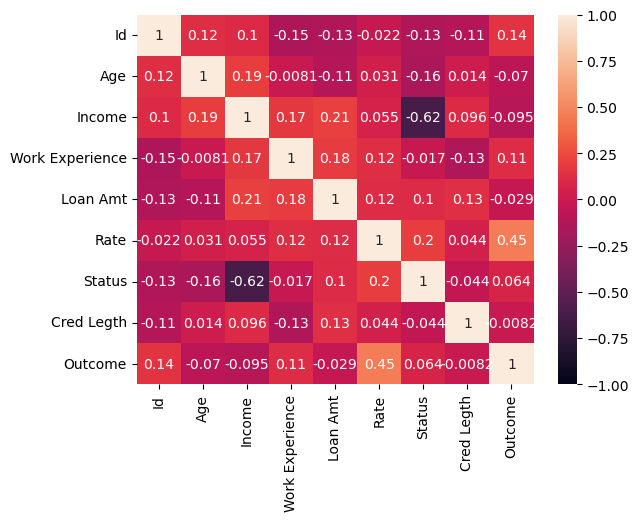

In [8]:
#5
#EDA-Visualize the data
#plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Work Experience'}>,
        <Axes: title={'center': 'Loan Amt'}>,
        <Axes: title={'center': 'Rate'}>],
       [<Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'Cred Legth'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

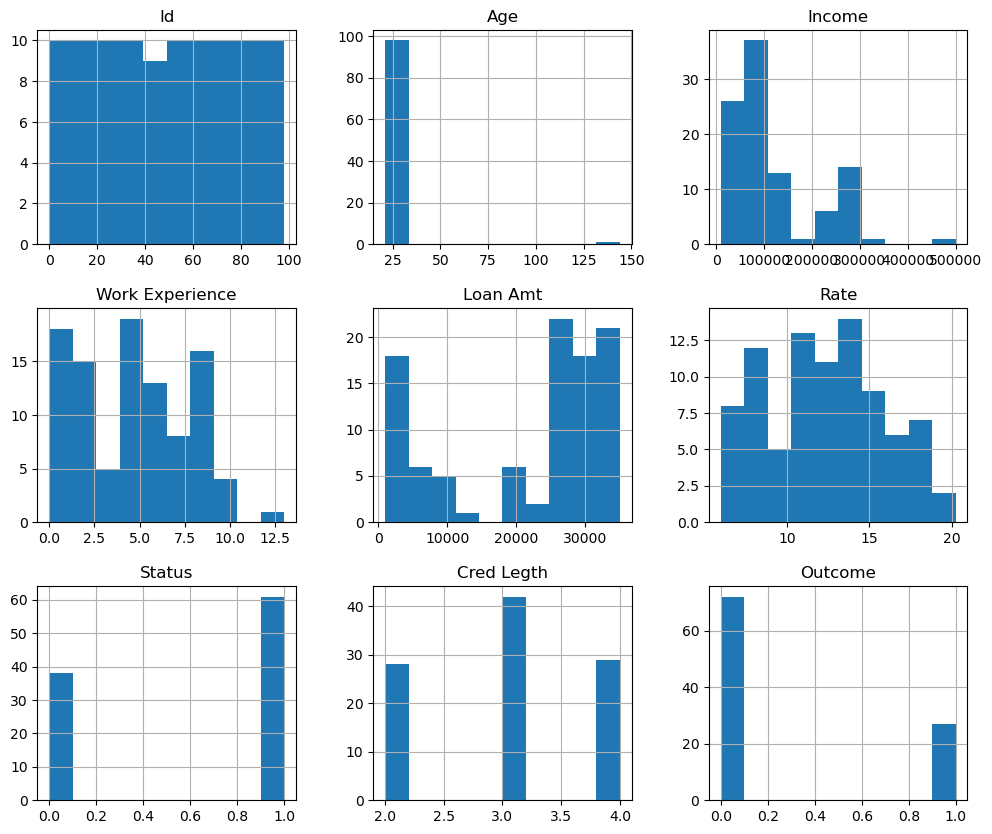

In [9]:
data.hist(figsize=(12,10))


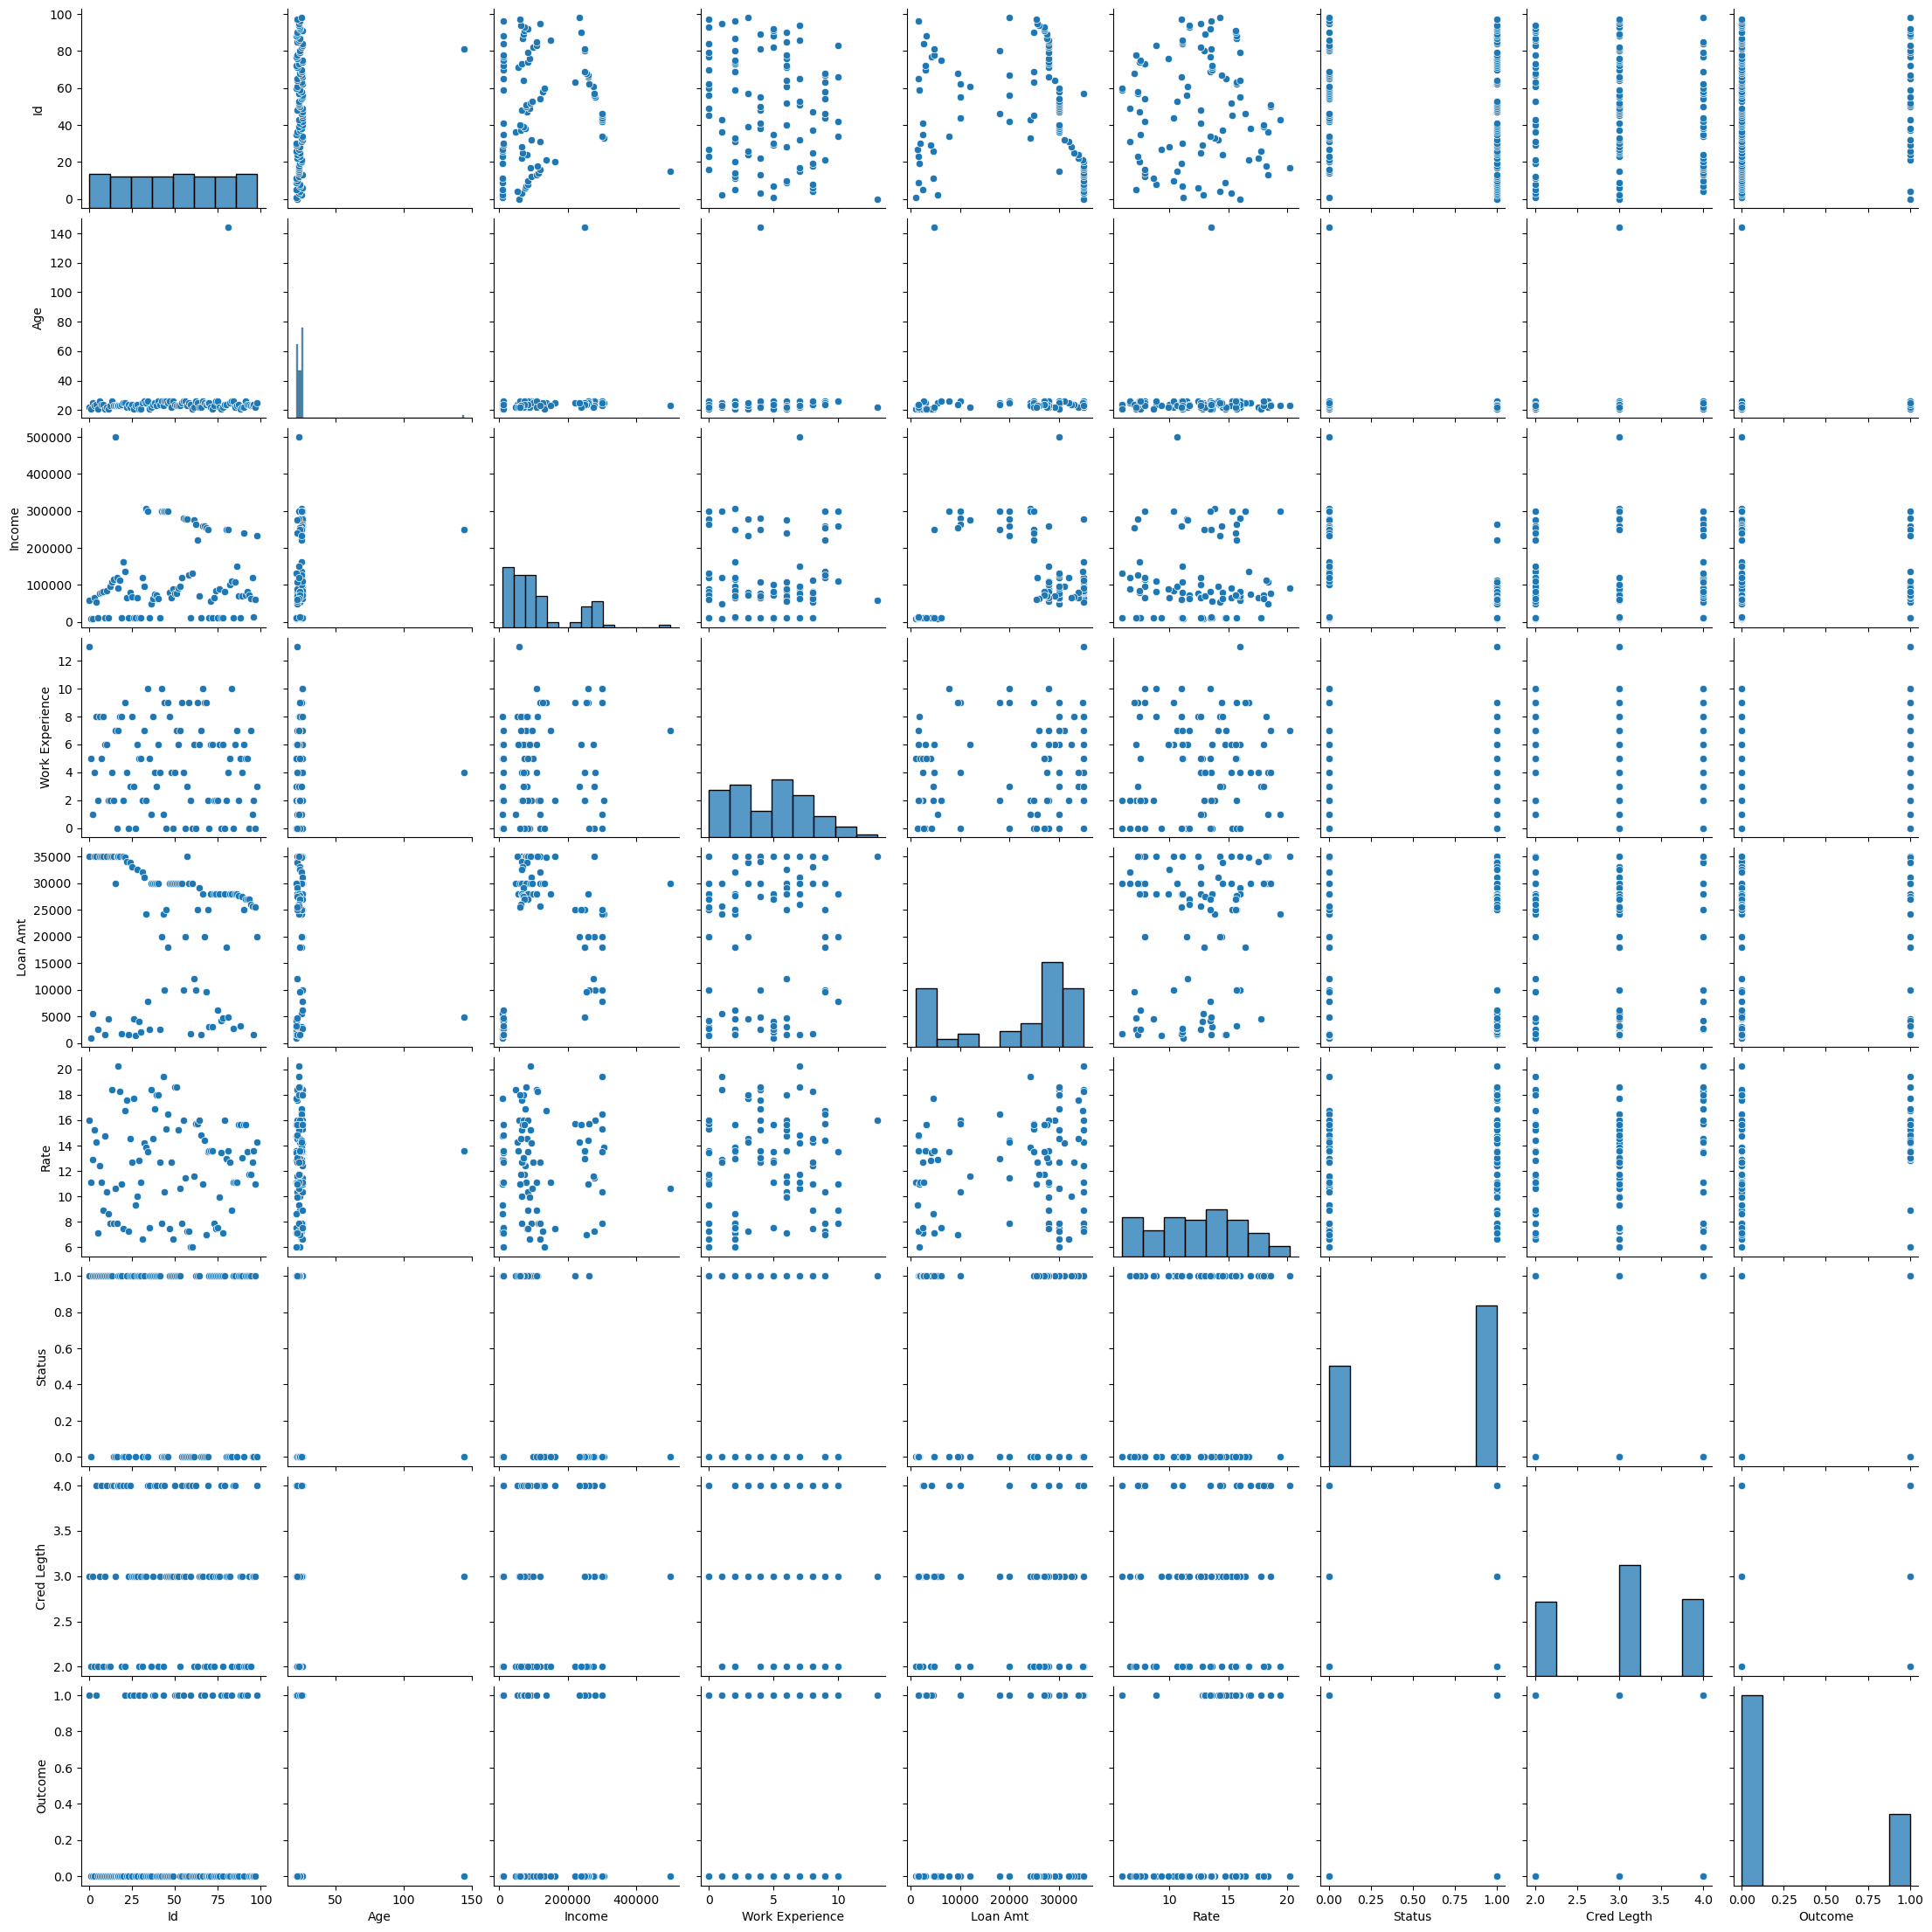

In [22]:
sns.pairplot(data)

In [10]:
data.isna().sum()

Id                  0
Age                 0
Income              0
Work Experience     0
Loan Amt            0
Rate               12
Status              0
Cred Legth          0
Outcome             0
dtype: int64

In [17]:
data=data.fillna(method='bfill')
data.isna().sum()

Id                 0
Age                0
Income             0
Work Experience    0
Loan Amt           0
Rate               0
Status             0
Cred Legth         0
Outcome            0
dtype: int64

In [18]:
#Assign x & y
data.head(2)

,Id,Age,Income,Work Experience,Loan Amt,Rate,Status,Cred Legth,Outcome
0,0,22,59000,13,35000,16.02,1,3,1
1,1,21,9600,5,1000,11.14,0,2,0


In [19]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]
print('X shape:\t',x.shape)
print()
print('Y shape:\t',y.shape)


X shape:	 (99, 8)

Y shape:	 (99, 1)


In [20]:
#Spliting the data for training & testing
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (89, 8)

Training data-y- Shape:	 (89, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (10, 8)

Testing data(y-Outcome) Shape:	 (10, 1)


In [54]:
#2
# Import necessary libraries
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset (assuming it's in a DataFrame)
# X should contain features, and y should contain the target (credit risk)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a linear SVM classifier
linear_svm_classifier = svm.SVC(kernel='linear')

# Train the linear SVM model
linear_svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_svm_classifier.predict(X_test)

# Evaluate the linear SVM model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [59]:
#3
#a
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'X' contains your feature data and 'y' contains the target labels (good or bad credit)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a non-linear SVM model with an RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_rbf.predict(X_test)


In [60]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [63]:
#6
from sklearn import svm

# Create and train a linear SVM model
linear_svm = svm.SVC(kernel='linear')
linear_svm.fit(x, y)

# Access the support vectors for the linear model
linear_support_vectors = linear_svm.support_vectors_

# Create and train a non-linear SVM model with an RBF kernel
rbf_svm = svm.SVC(kernel='rbf')
rbf_svm.fit(x, y)

# Access the support vectors for the non-linear model
rbf_support_vectors = rbf_svm.support_vectors_

In [64]:
#SVR with Non linear kernal - linear
support_reg=SVR(kernel='linear')
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [ 1.57211613  0.77500562  3.10857187  2.47744228  2.67192749  3.44730165
  2.73160221 -0.22341065  4.35151307 -0.63072628  1.62639632  2.90734196
  2.09159197 -0.55083192  0.46178088  2.26319084  1.82034543  2.45392761
  0.16996303  1.67492472  3.40190995  2.40357471  0.79668899  2.15168636
  5.38771707  2.00913522 -0.7003099   0.26455857  2.04877142  3.3153347
 -0.95490007  2.85970994  2.81750253  2.78975973  3.14882156  2.20677383
  3.11479055  1.42540685  1.6613213   3.61773718 -0.68296201  0.77459889
  2.66094126  2.63104131  1.56567303  0.54663745  3.29334473  0.28402875
  3.1054259   0.98577245  3.45613701  1.89662034  2.71024579  0.17852155
  3.62987931  1.26844841  1.57586558  0.9029233   2.32807555  2.38703056
  0.36823341  2.53246693  3.82979933  1.56531842  2.727794

In [65]:
#SVR with Non linear kernal - rbf
support_reg=SVR()
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [ 1.92178322  1.38473131  1.92871865  2.47207616  1.28375377  2.27667821
  1.87014697  1.25754881  1.51023814  0.06280182  1.91054019  2.04624874
  2.75587235  0.62917717  1.14572582  2.05930534  0.64984681  2.26779701
  0.41996134  1.1375342   2.84662585  1.81017464  1.30367693  1.49670874
  3.10549475  2.12358362  1.73612084  1.3145924   2.82324032  2.22746953
  0.79011369  2.46741817  2.00385447  1.83795648  1.94702016  2.00478716
  1.86375914  1.91406834  2.05015762  3.05281262  0.61805859  1.48888629
  1.44622016  2.12819128  1.84310097 -0.61109288  2.07437062  1.32780285
  2.19848212  1.22555848  3.02038735  1.75523713  2.57129478  1.96941871
  3.27700003  1.23291691  1.93357231  1.23609279  2.04374496  3.38441191
  0.42897973  2.33250665  1.87949445  2.1399816   3.10158038

In [68]:
#SVR with Non linear kernal - sigmoid
support_reg=SVR(kernel='sigmoid')
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [1.9001671  1.90065141 1.90027561 1.90053345 1.90008831 1.90000621
 1.89999762 1.89999772 1.8999905  1.90024432 1.90000786 1.90011041
 1.90003099 1.89999508 1.89999085 1.89999077 1.90161491 1.9000822
 1.90011157 1.90050376 1.90000079 1.89999397 1.90024922 1.90003062
 1.89999203 1.90000966 1.89999127 1.90000138 1.90004713 1.90021386
 1.9000279  1.89999047 1.89999028 1.90007732 1.90025117 1.90007555
 1.90022746 1.89999657 1.89999579 1.89999976 1.9000506  1.89999608
 1.90245661 1.9002365  1.9000177  1.90004739 1.89999055 1.90099318
 1.90007567 1.90012504 1.9000023  1.9000529  1.89999799 1.90000312
 1.90001092 1.89999203 1.90028091 1.90005185 1.89999163 1.90007529
 1.90005448 1.90000733 1.90044963 1.89999372 1.89999796 1.90003164
 1.89999403 1.90040516 1.90117922 1.90002841 1.900

# Support Vector Classification model

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;sns.set()
from scipy import stats
%matplotlib inline

In [9]:
#Load the data
data=pd.read_csv('credit_risk.csv')
data

,Id,Age,Income,Work Experience,Loan Amt,Rate,Status,Cred Legth,Outcome
0,0,22,59000,13,35000,16.02,1,3,1
1,1,21,9600,5,1000,11.14,0,2,0
2,2,25,9600,1,5500,12.87,1,3,0
3,3,23,65500,4,35000,15.23,1,2,0
4,4,24,54400,8,35000,14.27,1,4,1
...,...,...,...,...,...,...,...,...,...
94,94,23,62500,7,26000,11.71,1,2,0
95,95,23,120000,1,25600,12.69,0,3,0
96,96,24,12360,2,1600,13.57,0,3,0
97,97,22,60000,0,25475,10.99,1,3,0


In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=2)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(xtrain, ytrain)

SVC(kernel='linear')

In [14]:
y_pred = svm_classifier.predict(xtest)

In [15]:
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

In [16]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=2)
svm_classifier = SVC(kernel='sigmoid')
svm_classifier.fit(xtrain, ytrain)


SVC(kernel='sigmoid')

In [18]:
y_pred = svm_classifier.predict(xtest)

In [ ]:
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

In [19]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;sns.set()
from scipy import stats
%matplotlib inline

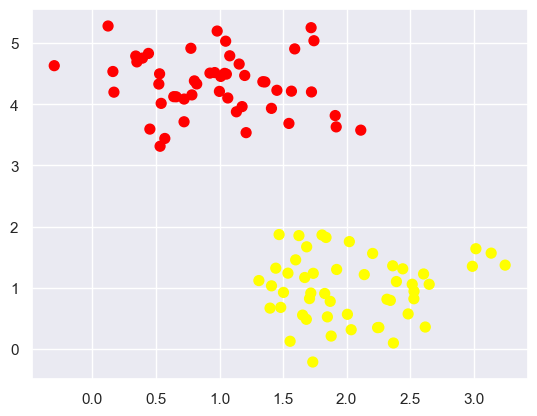

In [21]:
data=pd.read_csv('credit_risk.csv')
data.head()
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')

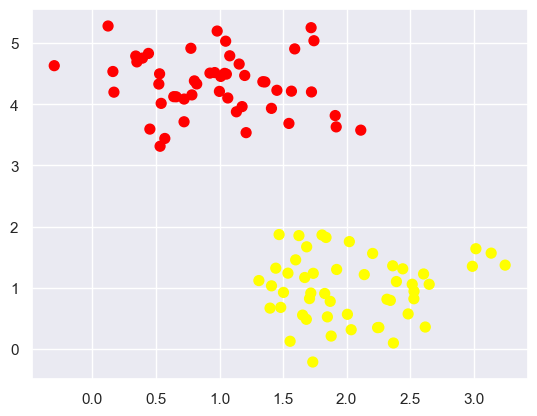

In [5]:
#Linear data
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')


(-1.0, 4.0)

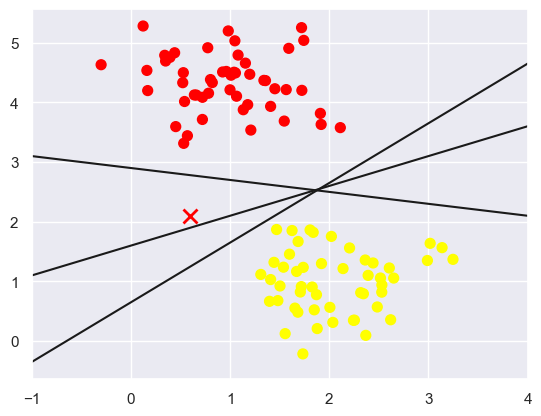

In [22]:
xfit=np.linspace(-1,4)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')
plt.xlim(-1,4)

(-1.0, 3.5)

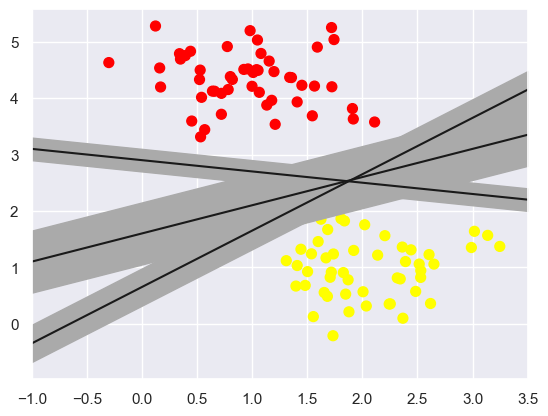

In [23]:
#Maximizing the margin
xfit=np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA')
plt.xlim(-1,3.5)


In [26]:
#Fitting a SVM from sklearn
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x,y)
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [27]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
 
 # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
 
 # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
              levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])
 
 # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


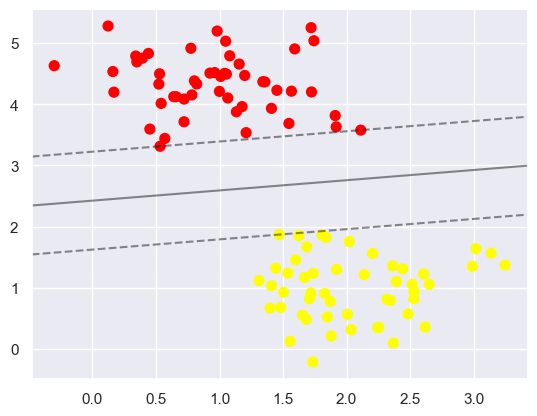

In [28]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model)


In [94]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

# Face Recognition with SVC

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#Load the dataset form sklearn
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print()
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']

(1140, 62, 47)


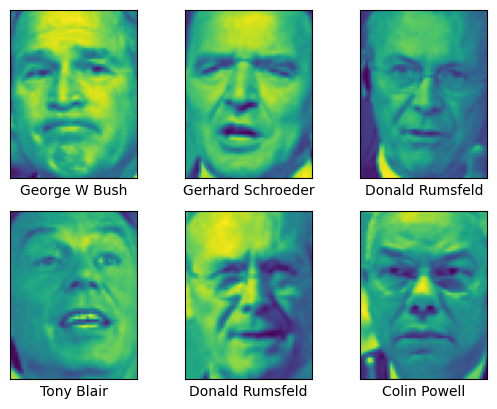

In [32]:
fig,ax=plt.subplots(2,3)
for i ,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i])
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

In [34]:
#Split the data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(faces.data,faces.target,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (855, 2914)

Training data-y- Shape:	 (855,)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (285, 2914)

Testing data(y-Outcome) Shape:	 (285,)


In [35]:
#Face Recognition Model
#Model parameter configuration
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca=PCA(n_components=150,whiten=True,random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced')
pipe_model=make_pipeline(pca,svc)
#train the model
from sklearn.model_selection import GridSearchCV # to get optimum parameter
param_grid={'svc__C':[1,5,10,20,50],
 'svc__gamma':[0.0001,0.0005,0.001,0.005]
 }
grid=GridSearchCV(pipe_model,param_grid)
%time grid.fit(xtrain,ytrain)
print(grid.best_params_)


CPU times: total: 1min 55s
Wall time: 30.4 s
{'svc__C': 1, 'svc__gamma': 0.005}


In [36]:
model=grid.best_estimator_
print(model)


Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=1, class_weight='balanced', gamma=0.005))])


In [37]:
#Test the model
yfit=model.predict(xtest)
yfit

array([2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 4, 0, 0, 2, 0, 2, 0, 1, 4, 2,
       0, 1, 4, 2, 0, 1, 2, 2, 0, 3, 2, 2, 2, 2, 4, 2, 2, 4, 0, 0, 2, 4,
       2, 0, 2, 1, 2, 0, 3, 2, 0, 2, 4, 0, 2, 0, 2, 3, 0, 3, 2, 2, 4, 2,
       3, 4, 2, 1, 0, 1, 3, 1, 2, 4, 3, 2, 2, 2, 1, 0, 0, 4, 2, 2, 4, 4,
       4, 2, 0, 2, 2, 2, 2, 0, 4, 4, 2, 0, 1, 2, 0, 1, 3, 2, 3, 0, 2, 2,
       1, 2, 2, 4, 4, 2, 0, 3, 1, 0, 1, 3, 0, 3, 4, 2, 0, 0, 0, 2, 0, 0,
       4, 2, 1, 0, 2, 4, 0, 2, 2, 2, 2, 2, 3, 2, 2, 4, 0, 1, 2, 2, 4, 2,
       2, 2, 2, 2, 3, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 4, 0,
       0, 2, 2, 0, 2, 3, 0, 1, 2, 4, 4, 2, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2,
       3, 2, 2, 3, 0, 4, 2, 0, 2, 2, 0, 1, 2, 2, 2, 3, 2, 2, 4, 2, 0, 2,
       1, 3, 0, 2, 2, 1, 4, 2, 0, 2, 2, 2, 0, 4, 2, 0, 0, 0, 2, 1, 2, 0,
       0, 3, 4, 2, 2, 0, 0, 3, 2, 0, 0, 2, 2, 4, 2, 1, 4, 0, 0, 2, 2, 2,
       2, 2, 0, 2, 1, 2, 4, 3, 0, 4, 0, 2, 2, 2, 2, 2, 2, 0, 4, 2, 2],
      dtype=int64)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

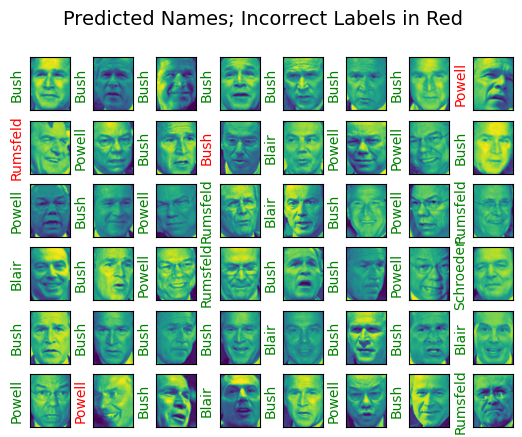

In [38]:
#Plot the outcome
fig,ax=plt.subplots(6,8)
for i ,axi in enumerate(ax.flat):
    axi.imshow(xtest[i].reshape(62,47))
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='green'
 if yfit[i]==ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red',size=14)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

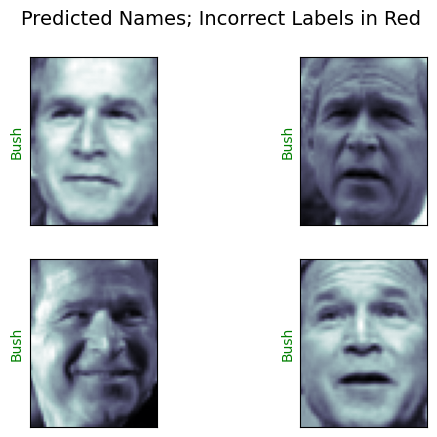

In [39]:
fig,ax=plt.subplots(2,2)
for i ,axi in enumerate(ax.flat):
    axi.imshow(xtest[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='green'
 if yfit[i]==ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red',size=14)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

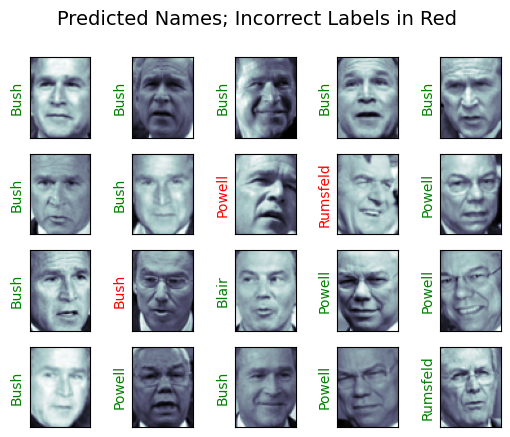

In [40]:
fig,ax=plt.subplots(4,5)
for i ,axi in enumerate(ax.flat):
    axi.imshow(xtest[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='green'
 if yfit[i]==ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red',size=14)


In [42]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('='*80)
print('Accuracy Score:\n',accuracy_score(ytest,yfit))
print('='*80)
print('Confusion Matrix:\n',confusion_matrix(ytest,yfit))
print('-'*80)
print('Classification Report:\n',classification_report(ytest,yfit))
print('='*80)

Accuracy Score:
 0.887719298245614
Confusion Matrix:
 [[ 62   0   1   0   0]
 [  1  20   3   0   2]
 [  4   3 119   0   0]
 [  1   2   6  19   1]
 [  3   0   2   3  33]]
--------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.93        63
           1       0.80      0.77      0.78        26
           2       0.91      0.94      0.93       126
           3       0.86      0.66      0.75        29
           4       0.92      0.80      0.86        41

    accuracy                           0.89       285
   macro avg       0.87      0.83      0.85       285
weighted avg       0.89      0.89      0.88       285



Text(50.72222222222221, 0.5, 'Predicted label')

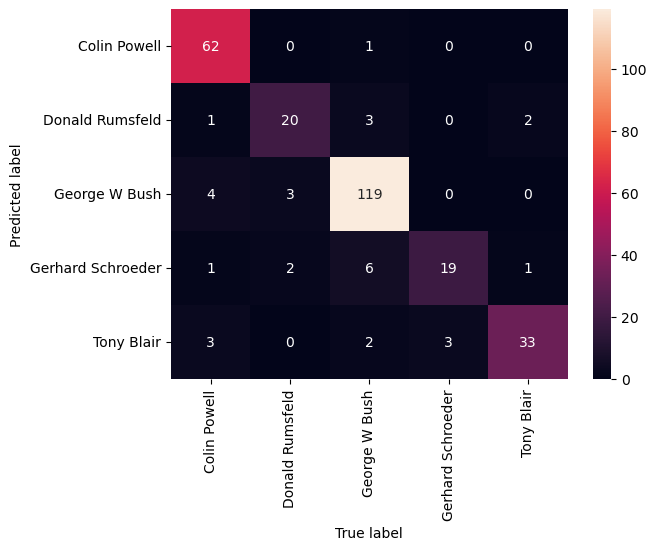

In [45]:
cm=confusion_matrix(ytest,yfit)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')